# Orbita de Mercuio
Potencial efectivo:
$$
V_{\text{efectivo}} = - \frac{GM}{r} + \frac{L^2}{2 m^2 r^2} - \frac{GM}{c^2} \frac{L^2}{m^2 r^3}
$$




In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np

e = 0.205
a = 5.79e10

# c = 3e8
#l = 2.71e15
#G = 6.67e-11

G = 1
c = 1
l = (1-e) * np.sqrt(a)

M = 1 #sol
r_s =  2 * G* M /c**2
E = 2 / (r_s * 3 * np.sqrt(3))

def Veff_rel(r):
    return -G*M/r + l/(2*r**2) - G*M*l**2/(c**2 * r**3)

def Veff(r):
    return -G*M/r + l/(2*r**2)

def dr_dtau(r,signo):
    return signo * np.sqrt(2*(E - Veff(r)))


def dphi_dtau(r):
    return l / r**2

def integracion_rphi(r_0, phi_0, signo, N = 10000, dtau = 0.01, max_r = 100.0):
    # comienzo del loop
    r_n = r_0
    phi_n = phi_0

    r_arr = []
    phi_arr = []

    for i in range(100000):
        r_arr.append(r_n)
        phi_arr.append(phi_n)

        # comienza la iteracion
        r_n = r_n + dtau * dr_dtau(r_n, signo)
        phi_n = phi_n + dtau * dphi_dtau(r_n)


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    # dibujamos un black hole
    angulo_bh = np.linspace(0, 2*np.pi, 100)
    linea_bh = np.array( [r_s for i in range( len(angulo_bh))] )
    ax.plot(angulo_bh, linea_bh, '-', color="black")
    ax.plot(phi_arr, r_arr, '-')
    ax.set_rlim([0, max_r])
    ax.set_title("Mercurio")
    plt.show()

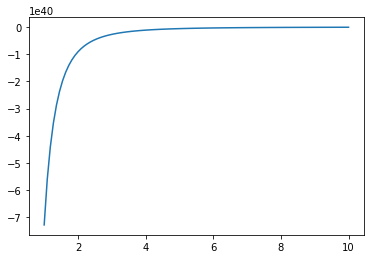

In [29]:
import matplotlib.pyplot as plt
import numpy as np

r = np.linspace(1,10, 100)
plt.plot(r,Veff_rel(r))

___

In [22]:
E-Veff(5)

2.65465458e+19

## Foton que viene desde el infinito

C:\Users\fbien.DESKTOP-6FMEAR7\AppData\Local\Temp\ipykernel_9960\2720191988.py:21: RuntimeWarning: invalid value encountered in sqrt
  return signo * np.sqrt(2*(E - Veff(r)))


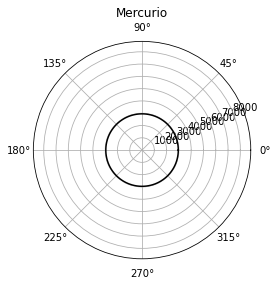

In [23]:
# desde el infinito
r_0 = r_s
phi_0 = 0

integracion_rphi(r_0, phi_0, signo = -1, N = 100000, dtau = 0.05, max_r = 3*r_s)

## Foton que viene cerca de la superficie

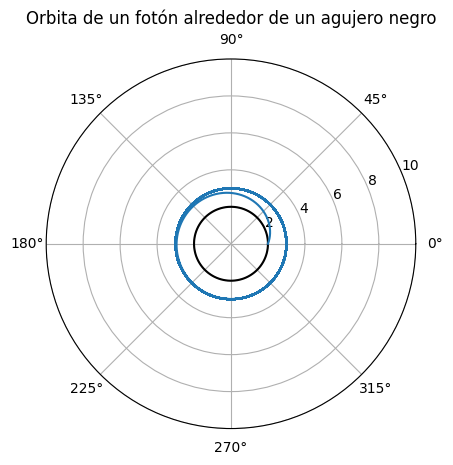

In [115]:
# desde el horizonte de eventos
r_0 = r_s
phi_0 = 0

integracion_rphi(r_0, phi_0, signo = +1, N = 100000, dtau = 0.05, max_r = 10.0)

___

# Intentos previos
estos no me llevaron a mucho, ignorarse
los dejo aqui para investigar en futuro como utilizar la integración simbolica

In [85]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

r_s = 2.0

# Define the variables
phi = sp.Symbol('phi')
u = sp.Function('u')(phi)

signo = -1

# Define the differential equation
ode = sp.diff(u, phi) + signo * sp.sqrt( (u - 2/(3*r_s) )**2 * (u + 1/(3 * r_s) )  * r_s ) 

# Solve the differential equation
sol = sp.dsolve(ode)

# Apply the initial condition
ics = {sol.rhs.subs(phi, 0): 2.0}  # condiciones iniciales
sol = sol.subs(ics) 

sol

Eq(1.0*Integral(1/sqrt((1.0*_y - 0.333333333333333)**2*(1.0*_y + 0.166666666666667)), (_y, u(phi))), 1.4142135623731*phi + 2.0)

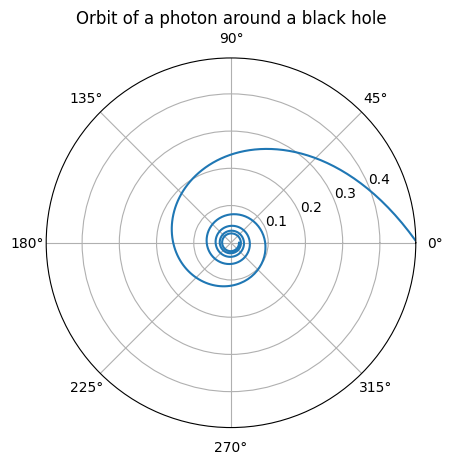

In [87]:
# Convert the solution into a Python function
u_func = sp.lambdify(phi, sol.rhs, 'numpy')
# r_func = sp.lambdify(phi, 1/sol.rhs, 'numpy')

# Define the time 
if signo > 0:
    critical_phi = sp.solve( sol.rhs , phi)
    critical_phi = float(critical_phi[0].evalf())
    phi_arr = np.linspace(-6 * np.pi, 0.0 + 0.1, 600)
else:
    phi_arr = np.linspace(0 + 0.01, 10 * np.pi, 600)

# Integrate the function numerically
u_arr = u_func(phi_arr)
r_arr = 1/u_func(phi_arr)


# Plot the values of r as a function of phi
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(phi_arr, r_arr, '-')

# Set the limit of the radial axis to the maximum value of r
ax.set_rlim([0, np.max(r_arr)])

# Set the title of the plot
ax.set_title("Orbit of a photon around a black hole")

# Show the plot
plt.show()
